In [3]:
def emotions(bt):
    bt = bt.sort_values('時間')
    bt["sentiment"] = bt["本文"].apply(sentimentize)
    bt
    # 感情を6段階に分類
    # 段階分けする境界値を設定
    sent_grades = [-np.inf, -0.2, -0.001, 0.001, 0.2, 0.4, 0.6, np.inf]
    # 各段階の名称を設定
    sent_labels = ["0_ex_negative", "1_bit_negative", "2_neutral", "3_bit_positive", "4_mid_positive", "5_so_positive", "6_ex_positive"]
    # 感情スコアを段階分け
    bt["sent_category"] = pd.cut(bt["sentiment"],
            bins=sent_grades,
            labels=sent_labels)

    # 感情を6段階に分類
    bt["sent_category"].value_counts().sort_index()
    # 段階分けする境界値を設定
    bt_sent_history = bt.set_index("時間").resample("300s").aggregate({"sent_category":"value_counts"}).unstack()
    # プロット領域を設定
    fig, ax = plt.subplots(figsize=(30,10))
    # 積み上げ面プロットで集計結果を可視化
    bt_sent_history.plot(stacked=True, ax=ax, kind="area")

In [4]:
import pandas as pd

In [5]:
hauru = pd.read_csv('data_csv/ハウルの動く城.csv',parse_dates=["時間"])

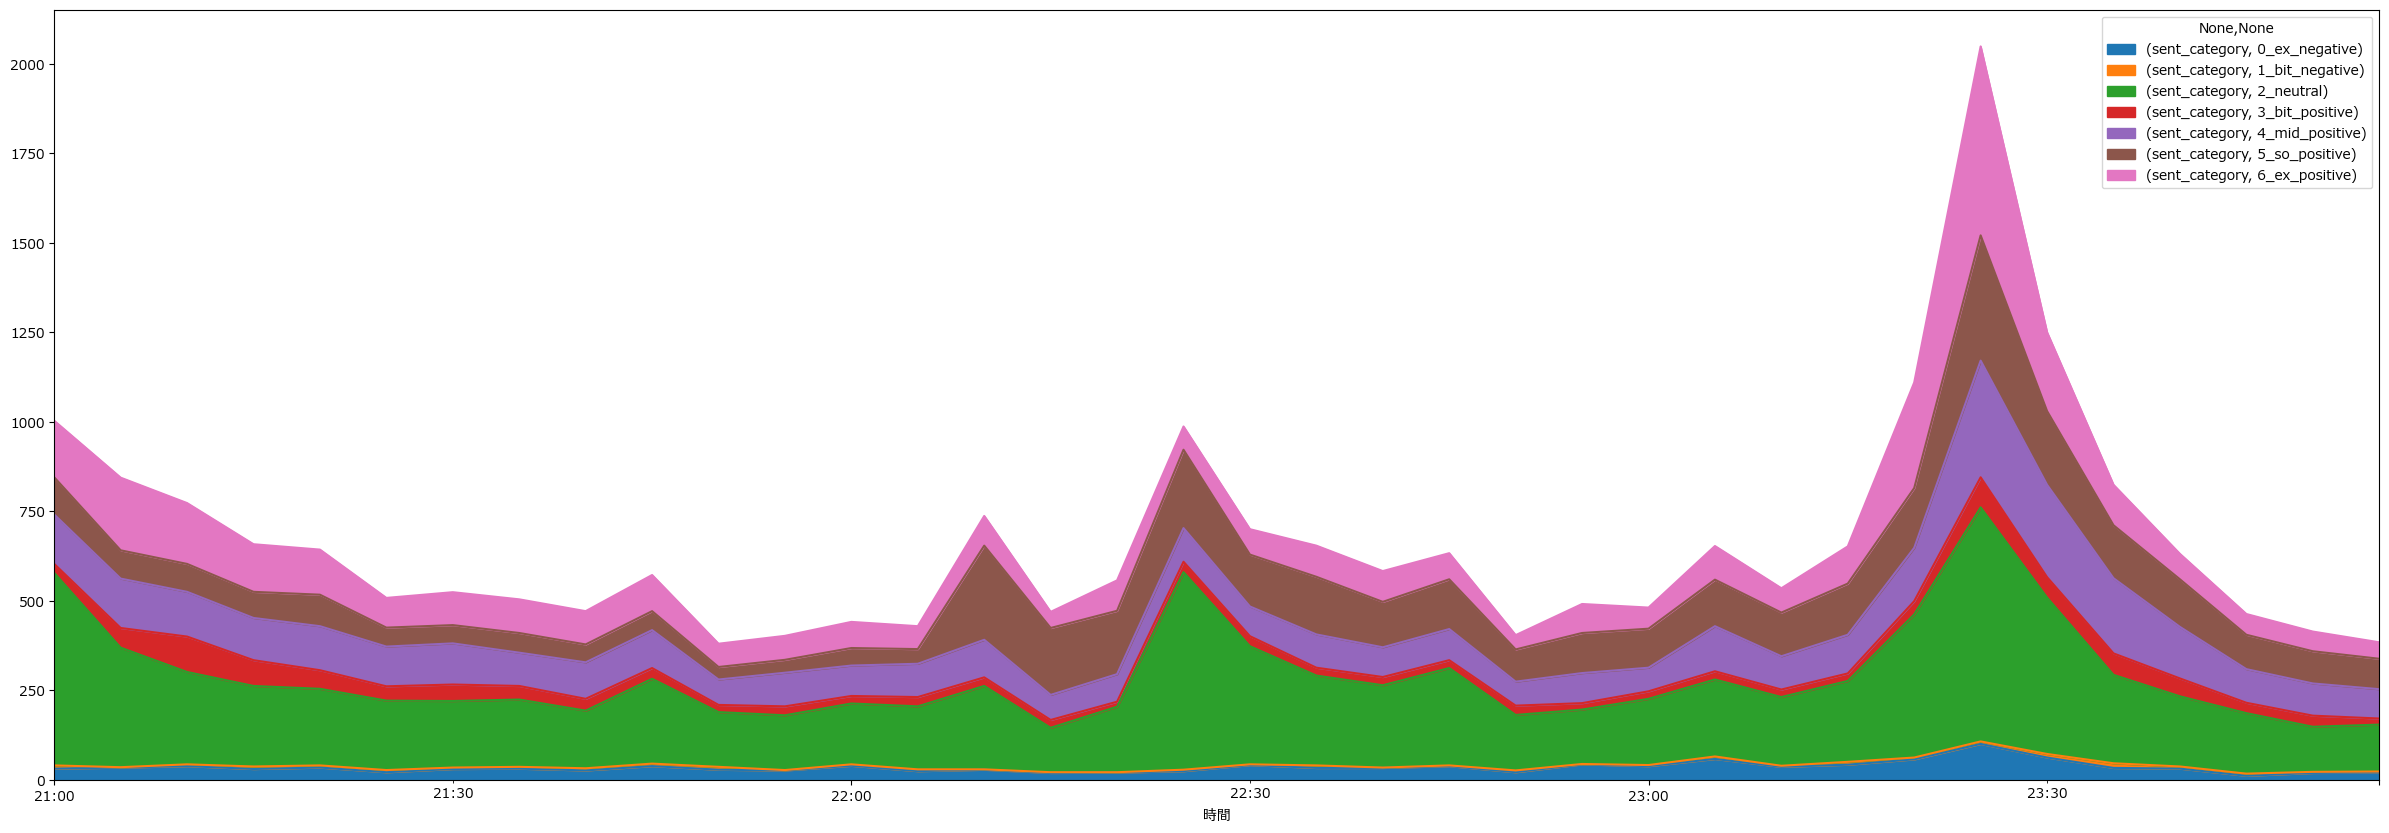

In [6]:
emotions(hauru)